<a href="https://colab.research.google.com/github/Yashu2699/Deep_learning/blob/main/9_leNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("The mnist dataset has a training set of %d samples" % len(x_train))

The mnist dataset has a training set of 60000 samples


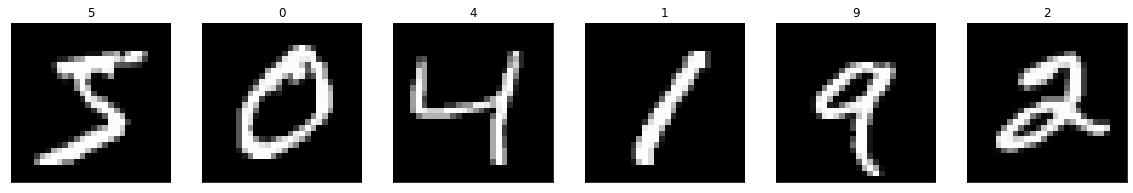

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(20,20))
for i in range(6):
  ax = fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
  ax.imshow(x_train[i], cmap='gray')
  ax.set_title(str(y_train[i]))

In [ ]:
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train - mean)/(std + 1e-7)
x_test = (x_test - mean)/(std + 1e-7)

In [ ]:
from keras.utils import np_utils

num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


In [ ]:
#reshape the data
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [ ]:
print(input_shape)
print(x_train.shape)

(28, 28, 1)
(60000, 28, 28, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(6, (5,5), strides=(1,1), activation='tanh', input_shape=input_shape, padding='same'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(16, (5,5), strides=(1,1), activation='tanh', padding='valid'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(120, (5,5), strides=(1,1), padding='valid', activation='tanh'))
model.add(Flatten())
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [ ]:
# compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

def lr_schedule(epoch):
  if epoch <= 2:
    lr = 5e-4
  elif epoch>2 and epoch<=5:
    lr = 2e-4
  elif epoch>5 and epoch<=9:
    lr = 5e-5
  else:
    lr = 1e-5
  return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)
  

hist = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test), callbacks=[checkpointer, lr_scheduler], verbose=2, shuffle=True)

Epoch 1/20

Epoch 00001: val_loss improved from inf to 0.09080, saving model to model.weights.best.hdf5
1875/1875 - 11s - loss: 0.2314 - accuracy: 0.9323 - val_loss: 0.0908 - val_accuracy: 0.9725 - lr: 5.0000e-04 - 11s/epoch - 6ms/step
Epoch 2/20

Epoch 00002: val_loss improved from 0.09080 to 0.06149, saving model to model.weights.best.hdf5
1875/1875 - 9s - loss: 0.0809 - accuracy: 0.9754 - val_loss: 0.0615 - val_accuracy: 0.9812 - lr: 5.0000e-04 - 9s/epoch - 5ms/step
Epoch 3/20

Epoch 00003: val_loss improved from 0.06149 to 0.04699, saving model to model.weights.best.hdf5
1875/1875 - 9s - loss: 0.0553 - accuracy: 0.9826 - val_loss: 0.0470 - val_accuracy: 0.9847 - lr: 5.0000e-04 - 9s/epoch - 5ms/step
Epoch 4/20

Epoch 00004: val_loss improved from 0.04699 to 0.04412, saving model to model.weights.best.hdf5
1875/1875 - 9s - loss: 0.0323 - accuracy: 0.9906 - val_loss: 0.0441 - val_accuracy: 0.9859 - lr: 2.0000e-04 - 9s/epoch - 5ms/step
Epoch 5/20

Epoch 00005: val_loss improved from 0.

In [ ]:
model.load_weights('model.weights.best.hdf5')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score)
accuracy = score[1]*100
print('Test accuracy: %.2f%%' %accuracy)

[0.03069131448864937, 0.9901999831199646]
Test accuracy: 99.02%


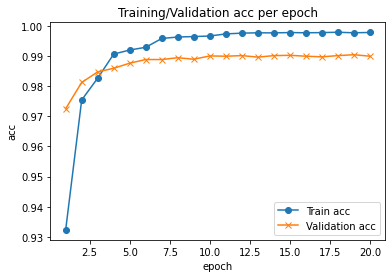

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc=0)
ax.set_title('Training/Validation acc per epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
plt.show()


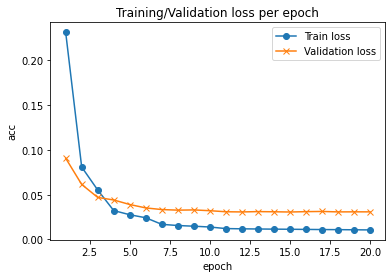

In [ ]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
ax.legend(['Train loss', 'Validation loss'], loc=0)
ax.set_title('Training/Validation loss per epoch')
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
plt.show()
